In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습 11주차/WISDM.csv')

In [3]:
df

,0,33,Jogging,4.9106E+13,-0.6946377,12.680544,0.50395286
0,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...
1048569,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [4]:
df.columns = ['a', 'b', 'activity', 'd', 'ax', 'ay','az']

In [5]:
df = df.drop(columns=['a', 'b', 'd'])

In [6]:
df['activity'].unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [7]:
df = df[df['activity'].isin(['Jogging', 'Sitting'])]

In [8]:
df

,activity,ax,ay,az
0,Jogging,5.012288,11.264028,0.953424
1,Jogging,4.903325,10.882658,-0.081722
2,Jogging,-0.612916,18.496431,3.023717
3,Jogging,-1.184970,12.108489,7.205164
4,Jogging,1.375655,-2.492524,-6.510526
...,...,...,...,...
1036604,Jogging,1.420000,-2.340000,1.950000
1036605,Jogging,-0.800000,0.230000,0.950000
1036606,Jogging,-0.110000,9.110000,-0.930000
1036607,Jogging,-2.560000,20.040000,0.080000


In [9]:
df.shape

(380850, 4)

In [10]:
df.isnull().values.any()

np.False_

In [11]:
LABELS = ["Normal", "Sitting"]

/tmp/ipython-input-1671878960.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


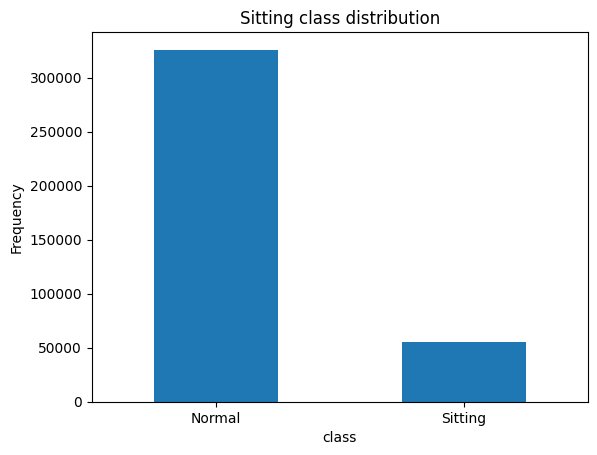

In [12]:
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Sitting class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("class")
plt.ylabel("Frequency");

In [13]:
df['activity_b'] = (df['activity'] == 'Sitting').astype(int)

In [14]:
df[df['activity_b'] ==1]

,activity,ax,ay,az,activity_b
221332,Sitting,2.60,9.66,1.035146,1
221333,Sitting,2.68,9.53,0.503953,1
221334,Sitting,3.49,8.89,0.762740,1
221335,Sitting,3.64,9.38,0.926184,1
221336,Sitting,2.91,9.34,1.035146,1
...,...,...,...,...,...
893926,Sitting,1.38,0.00,9.660000,1
893927,Sitting,1.38,-0.04,9.660000,1
893928,Sitting,1.50,-0.08,9.620000,1
893929,Sitting,1.42,-0.04,9.660000,1


In [15]:
sitting = df[df['activity_b'] == 1]
normal = df[df['activity_b'] == 0]
sitting.shape

(54876, 5)

In [16]:
normal.shape

(325974, 5)

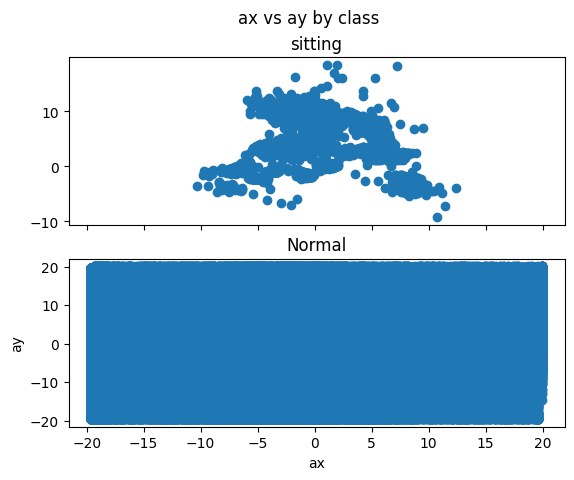

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('ax vs ay by class')

ax1.scatter(sitting.ax, sitting.ay)
ax1.set_title('sitting')

ax2.scatter(normal.ax, normal.ay)
ax2.set_title('Normal')

plt.xlabel('ax')
plt.ylabel('ay')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

data = df.copy()
data = data.drop(columns=['activity'])

data[['ax', 'ay', 'az']] = StandardScaler().fit_transform(data[['ax', 'ay', 'az']])

In [19]:
data

,ax,ay,az,activity_b
0,0.556343,0.704066,0.009100,0
1,0.543531,0.660088,-0.159564,0
2,-0.105062,1.538081,0.346429,0
3,-0.172323,0.801446,1.027744,0
4,0.128752,-0.882291,-1.207059,0
...,...,...,...,...
1036604,0.133966,-0.864702,0.171480,0
1036605,-0.127059,-0.568339,0.008542,0
1036606,-0.045930,0.455671,-0.297781,0
1036607,-0.333998,1.716080,-0.133214,0


In [20]:
RANDOM_SEED = 42

In [21]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train['activity_b'] == 0]
X_train = X_train.drop(['activity_b'], axis=1)

y_test = X_test['activity_b']
X_test = X_test.drop(['activity_b'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape
X_test.shape
y_test.value_counts()

,count
activity_b,
0,65155
1,11015


In [22]:
# 오토인코더 모델
from tensorflow.keras.layers import Dropout

input_dim = X_train.shape[1]
encoding_dim = 3  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [23]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1,
                          )

Epoch 1/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.2832 - val_loss: 1.0949
Epoch 2/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0703 - val_loss: 0.9779
Epoch 3/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9694 - val_loss: 0.9095
Epoch 4/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9001 - val_loss: 0.8553
Epoch 5/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8510 - val_loss: 0.8175
Epoch 6/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8159 - val_loss: 0.7941
Epoch 7/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7969 - val_loss: 0.7794
Epoch 8/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7797 - val_loss: 0.7693
Epoch 9/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7768 - val_loss: 0.7620
Epoch 10/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7688 - val_loss: 0.7570
Epoch 11/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7608 - val_loss: 0.7530
Epoch 12/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

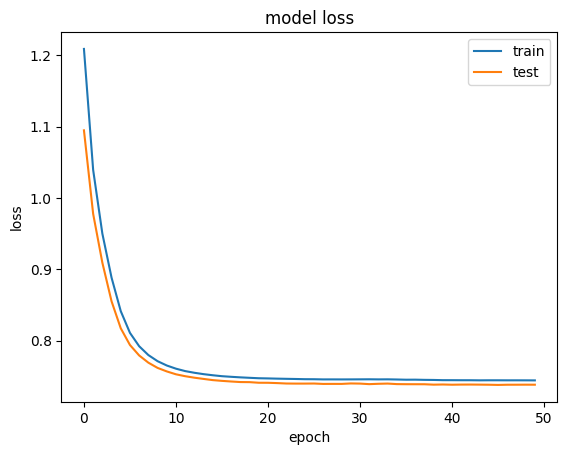

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [25]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,reconstruction_error,true_class
count,76170.000000,76170.000000
mean,0.669575,0.144611
std,0.782071,0.351710
min,0.000110,0.000000
25%,0.162760,0.000000
50%,0.370714,0.000000
75%,0.863008,0.000000
max,7.002492,1.000000


In [26]:
error_df.head()

,reconstruction_error,true_class
469045,0.163707,1
169577,0.324567,0
639903,0.608329,1
962556,2.281561,0
546410,0.085900,0


In [27]:
threshold = np.percentile(
    error_df[error_df['true_class'] == 0]['reconstruction_error'],
    95
)

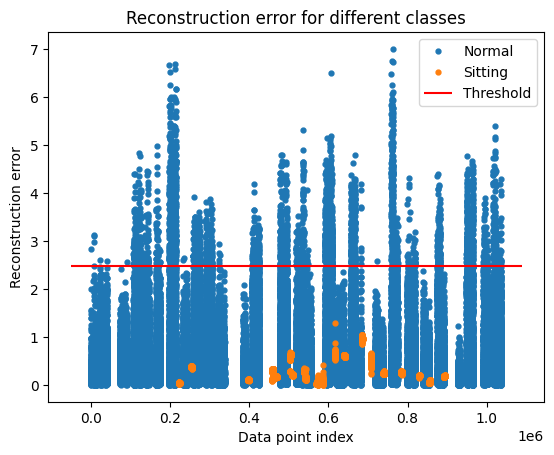

In [28]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Sitting" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();